## Course: DSC550
## Assignment: 6.3 Project Milestone 1
## Name: Laura Hoffmann
## Date: 4/24/2021

#### Import the Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('strokedata.csv')

In [3]:
data.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [4]:
# Rename columns to get a cleaner feel on the data set
data = data.rename(columns = {'id': 'ID', 'gender': 'Gender', 'age': 'Age', 'hypertension': 'Hypertension',
                             'heart_disease': 'Heart_Disease', 'ever_married': 'Married', 'work_type': 'Work',
                             'Residence_type': 'Residence', 'avg_glucose_level': 'Glucose', 'bmi': 'BMI',
                             'smoking_status': 'Smoking_Status', 'stroke': 'Stroke'}, inplace = False)

# Replace stroke 1s and 2s with Yes and no
data = data.replace({'Stroke': {1: 'Yes', 0: 'No'}})

In [5]:
# Print the dimensions of the df
print('Dimensions:',data.shape)
# Print the first few rows of the df
data.head()

Dimensions: (5110, 12)


,ID,Gender,Age,Hypertension,Heart_Disease,Married,Work,Residence,Glucose,BMI,Smoking_Status,Stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


In [6]:
# Find what types of variables are in the df
# Numerical data
print("Describe Data:")
print(round(data.describe(),2))
print("*"*70)
# Text data
print("Summarized Data:")
print(data.describe(include=['O']))

Describe Data:
             ID      Age  Hypertension  Heart_Disease  Glucose      BMI
count   5110.00  5110.00        5110.0        5110.00  5110.00  4909.00
mean   36517.83    43.23           0.1           0.05   106.15    28.89
std    21161.72    22.61           0.3           0.23    45.28     7.85
min       67.00     0.08           0.0           0.00    55.12    10.30
25%    17741.25    25.00           0.0           0.00    77.24    23.50
50%    36932.00    45.00           0.0           0.00    91.88    28.10
75%    54682.00    61.00           0.0           0.00   114.09    33.10
max    72940.00    82.00           1.0           1.00   271.74    97.60
**********************************************************************
Summarized Data:
        Gender Married     Work Residence Smoking_Status Stroke
count     5110    5110     5110      5110           5110   5110
unique       3       2        5         2              4      2
top     Female     Yes  Private     Urban   never smoked 

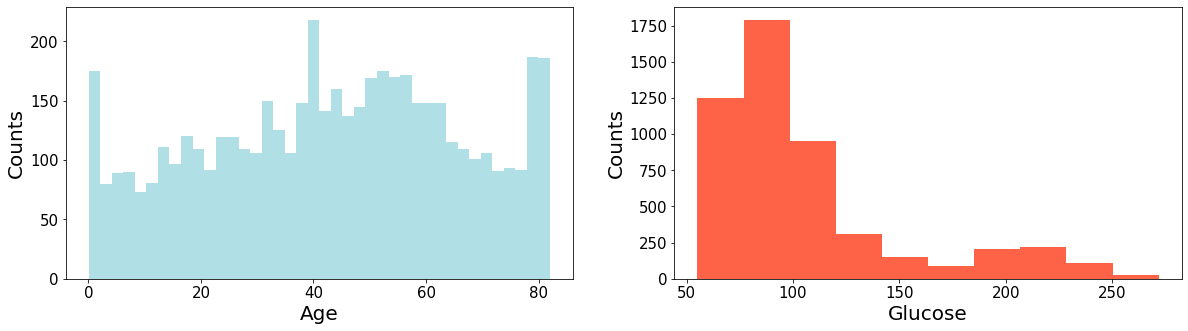

In [9]:
# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 5)

# Make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# X axes, colors and bins
x_axes = ['Age', 'Glucose']
colors = ['powderblue', 'tomato']
bins = [40, 10]

# Make the graphs
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[x_axes[idx]].dropna(), bins=bins[idx], color=colors[idx])
    ax.set_xlabel(x_axes[idx], fontsize=20)
    ax.set_ylabel('Counts', fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

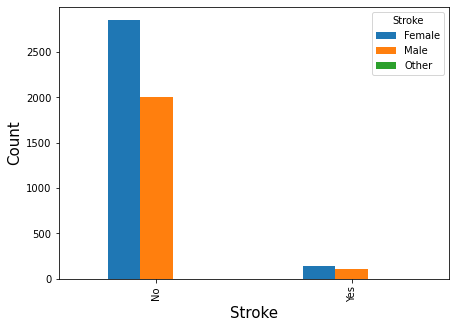

In [21]:
genderstroke = data.groupby(['Stroke']).Gender.value_counts().unstack()

# plot
genderstroke.plot.bar(figsize=(7, 5))
plt.legend(title='Stroke', loc='upper right')
plt.xlabel('Stroke', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


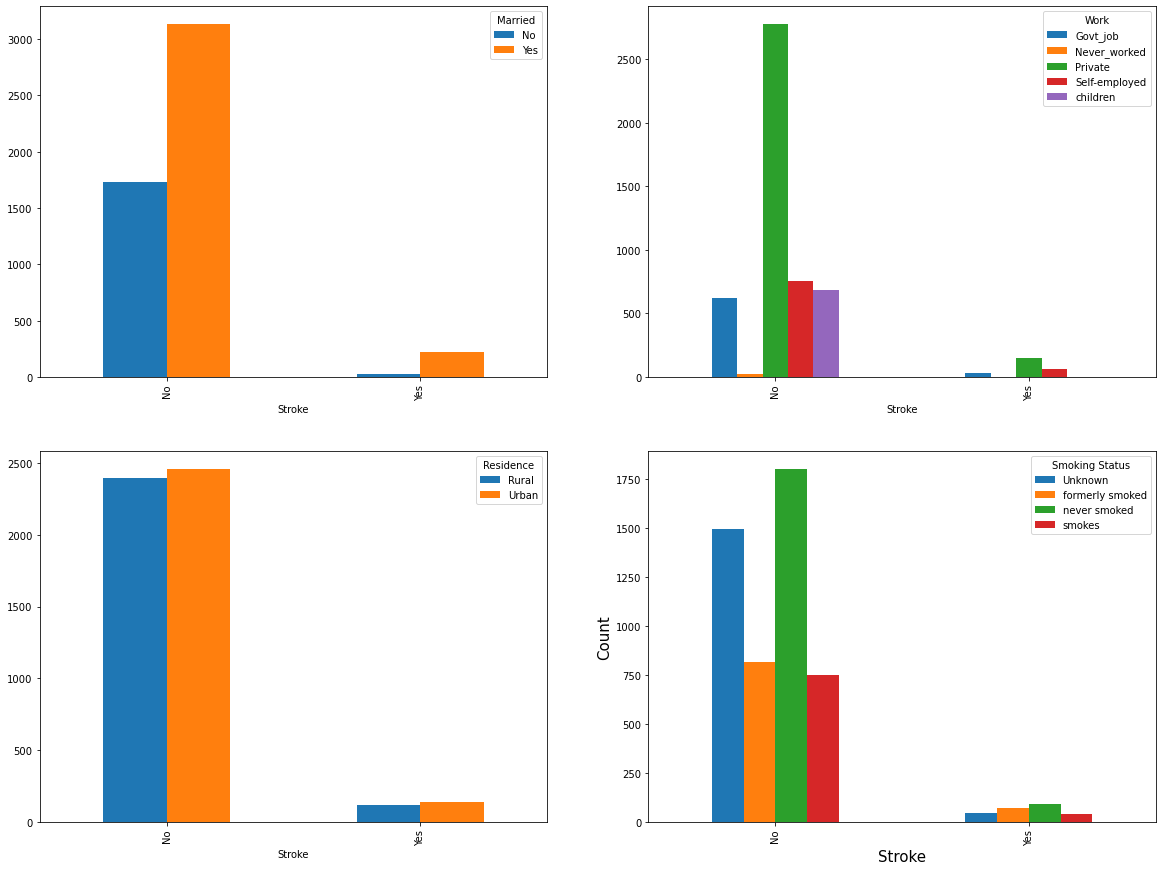

In [28]:
marriedstroke = data.groupby(['Stroke']).Married.value_counts().unstack()
workstroke = data.groupby(['Stroke']).Work.value_counts().unstack()
residencestroke = data.groupby(['Stroke']).Residence.value_counts().unstack()
smokestroke = data.groupby(['Stroke']).Smoking_Status.value_counts().unstack()

plt.rcParams['figure.figsize'] = (20, 15)
fig, axes = plt.subplots(nrows = 2, ncols = 2)

marriedstroke.plot.bar(ax=axes[0,0])
plt.legend(title='Married', loc='upper right')
plt.xlabel('Stroke', fontsize=15)
plt.ylabel('Counts', fontsize=15)

workstroke.plot.bar(ax=axes[0,1])
plt.legend(title='Work', loc='upper right')
plt.xlabel('Stroke', fontsize=15)
plt.ylabel('Counts', fontsize=15)

residencestroke.plot.bar(ax=axes[1,0])
plt.legend(title='Residence', loc='upper right')
plt.xlabel('Stroke', fontsize=15)
plt.ylabel('Counts', fontsize=15)

smokestroke.plot.bar(ax=axes[1,1])
plt.legend(title='Smoking Status', loc='upper right')
plt.xlabel('Stroke', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()